# <font color='darkred'>Walmart Online Pick-up Orders Machine</font>

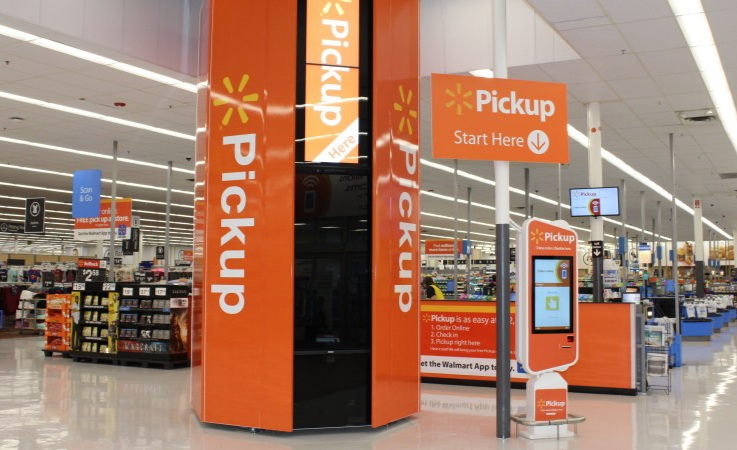

# Appendix
- Click on the links:
>1. <a href=#imports>Imports</a>
>2. <a href=#LoadData>Load Data</a>
>3. <a href=#DataFormating>Data Formating</a>
>4. <a href=#DataCleaning>Data Cleaning & Analysing</a>
>5. <a href=#Question>Questions & Insights</a>
>6. <a href=#Conculsion>Conculsion</a>

## Company Background

Walmart Inc. is an American multinational retail corporation that runs a chain of hypermarkets, discount department stores, and grocery stores from the United State. The company was founded by Sam Walton in nearby Rogers Arkansas in 1962.

## Motivation

In 2018, Walmart launched a giant vending machine for online pickup orders at one of thier largest stores in NY city. Customers simply arrange their shipment ahead of time, visit the store, and access their order via a barcode scanner on the side of the machine.Each package is preloaded by workers.

Walmart is planning to expand their business and reach out to more shoppers through their pickup machine. Their objective is to find out the most crawded stores. We will help them by analyzing their sales dataset and providing to them the stores that are sutiable to their pickup machine.

## Questions/Needs

>1. What are the highest 10 stores based on weekly sales?
>2. Which store has maximum sales?
>3. What are the lowest 10 stores based on weekly sales?
>4. Which store has minimum sales?
>5. What are the monthly sales for each year? (2010-2011-2012)
>6. Some holidays have a negative impact on sales, which holidays have lowest sales?

## Data Description 
We will be using Walmart sales dataset

- (Store) the store number
- (Date)  the week of sales
- (Weekly_Sales) sales for the given store
- (Holiday_Flag) whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- (Temperature) Temperature on the day of sale
- (Fuel_Price) Cost of fuel in the region
- (CPI) Prevailing consumer price index
- (Unemployment) Prevailing unemployment rate

#### Holiday Events
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


# <a name='imports' >Libraries Imports</a> 

In [86]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# This is allows the visuals to render within your Jupyter Notebook
from matplotlib import dates
from datetime import datetime

# <a name='LoadData' >Load Data</a> 

In [87]:
df = pd.read_csv("Walmart_Store_sales.csv") # Loading the dataset

In [88]:
df.head() #show the first 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0.0,32.00,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1.0,44.70,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0.0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0.0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0.0,46.50,2.625,211.350143,8.106


In [89]:
df.tail() #show the last 5 rows by default

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0.0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0.0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0.0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0.0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0.0,58.85,3.882,192.308899,8.667


# <a name='DataFormating' >Data Formating</a> 

In [90]:
df.info() #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6426 non-null   object 
 2   Weekly_Sales  6431 non-null   float64
 3   Holiday_Flag  6427 non-null   float64
 4   Temperature   6422 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6423 non-null   float64
 7   Unemployment  6411 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 402.3+ KB


In [91]:
df.shape # the numbers of rows & columns in the dataframe

(6435, 8)

In [92]:
df.columns #shows the name of columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [93]:
df.describe() #used to view some basic statistical details like percentile, mean, std


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.431000e+03,6427.000000,6422.000000,6435.000000,6423.000000,6411.000000
mean,23.000000,1.047970e+06,0.070017,60.639872,3.358607,171.489584,8.000447
std,12.988182,5.667637e+05,0.255196,18.445294,0.459020,39.339506,1.879101
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.538695e+05,0.000000,47.412500,2.933000,131.735000,6.891000
50%,23.000000,9.609985e+05,0.000000,62.650000,3.445000,182.598306,7.874000
75%,34.000000,1.420758e+06,0.000000,74.915000,3.735000,212.607039,8.622000
max,45.000000,5.401395e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# <a name='DataCleaning' >Data Cleaning & Analysing</a> 

In [101]:
# to change the date type from object to datetime

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6426 non-null   datetime64[ns]
 2   Weekly_Sales  6431 non-null   float64       
 3   Holiday_Flag  6427 non-null   float64       
 4   Temperature   6422 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6423 non-null   float64       
 7   Unemployment  6411 non-null   float64       
 8   Day           6426 non-null   float64       
 9   Month         6426 non-null   float64       
 10  Year          6426 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 553.1 KB


In [103]:

# create new columns (Day, Month, and Year)
df["Day"] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0.0,32.00,2.572,211.096358,8.106,2.0,5.0,2010.0
1,1,2010-12-02,1641957.44,1.0,44.70,2.548,211.242170,8.106,2.0,12.0,2010.0
2,1,2010-02-19,1611968.17,0.0,39.93,2.514,211.289143,8.106,19.0,2.0,2010.0
3,1,2010-02-26,1409727.59,0.0,46.63,2.561,211.319643,8.106,26.0,2.0,2010.0
4,1,2010-05-03,1554806.68,0.0,46.50,2.625,211.350143,8.106,3.0,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0.0,64.88,3.997,192.013558,8.684,28.0,9.0,2012.0
6431,45,2012-05-10,733455.07,0.0,64.89,3.985,192.170412,8.667,10.0,5.0,2012.0
6432,45,2012-12-10,734464.36,0.0,54.47,4.000,192.327265,8.667,10.0,12.0,2012.0
6433,45,2012-10-19,718125.53,0.0,56.47,3.969,192.330854,8.667,19.0,10.0,2012.0


In [104]:
df.shape

(6435, 11)

In [105]:
# Handling Missing Values

df.isna().sum() #find sum of null values

Store            0
Date             9
Weekly_Sales     4
Holiday_Flag     8
Temperature     13
Fuel_Price       0
CPI             12
Unemployment    24
Day              9
Month            9
Year             9
dtype: int64

In [13]:
df.dropna(subset=['Temperature'],inplace=True) #drob null values by rows

In [14]:
df.dropna(subset=['Unemployment'],inplace=True) #drob null values by rows

In [15]:
df.dropna(subset=['Date'],inplace=True) #drob null values by rows

In [16]:
df.dropna(subset=['Weekly_Sales'],inplace=True) #drob null values by rows

In [17]:
df.dropna(subset=['Holiday_Flag'],inplace=True) #drob null values by rows

In [18]:
df.dropna(subset=['CPI'],inplace=True) #drob null values by rows

In [106]:
df = df.dropna(axis = 0, how ='any')
  
print(df.isnull().sum())
df.shape

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64


(6367, 11)

# <a name='Question' >Questions & Insights</a> 

In [108]:
# first we would like to find out how many stores included in the dataset 

Total_stores= df['Store'].nunique()
print('The total stores in this dataset are: ', Total_stores)

The total stores in this dataset are:  45


### 1- What are the highest 10 stores based on weekly sales?

In [22]:
high10 = df.groupby(['Store'])[['Weekly_Sales']].max().sort_values(by = "Weekly_Sales", ascending = False).head(10)

In [109]:
high10

,Weekly_Sales
Store,
20,5401395.47
14,3818686.45
10,3749057.69
4,3676388.98
13,3595903.20
2,3436007.68
27,3078162.08
23,2734277.10
6,2727575.18


### 2- Which store has maximum sales?

In [110]:
top1 = df.groupby(['Store'])[['Weekly_Sales']].max().sort_values(by = "Weekly_Sales", ascending = False).head(1)
top1

,Weekly_Sales
Store,
20,5401395.47


### 3- What are the lowest 10 stores based on weekly sales?

In [111]:
low10 = df.groupby(['Store'])[['Weekly_Sales']].min().sort_values(by = "Weekly_Sales", ascending = True).head(10)

low10

,Weekly_Sales
Store,
33,209986.25
44,241937.11
5,260636.71
36,270677.98
38,303908.81
3,339597.38
16,368600.00
30,369722.32
7,372673.61


### 4- Which store has minimum sales?

In [112]:
low1 = df.groupby(['Store'])[['Weekly_Sales']].min().sort_values(by = "Weekly_Sales", ascending = True).head(1)
low1


,Weekly_Sales
Store,
33,209986.25


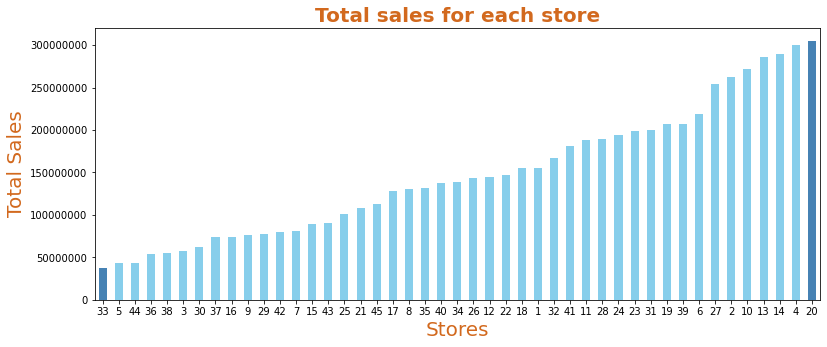

In [188]:
plt.figure(figsize=(13,5))

total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 

total_sales_array = np.array(total_sales) # convert to array

clrs = ['skyblue' if ((x < max(total_sales_array)) and (x > min(total_sales_array))) else 'steelblue' for x in total_sales_array]

ax = total_sales.plot(kind='bar',color=clrs);

plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store', fontsize = 20,weight='bold', color='chocolate')
plt.xlabel('Stores', fontsize = 20, color='chocolate')
plt.ylabel('Total Sales', fontsize = 20, color='chocolate');


## 5- What are the monthly sales for each year? (2010-2011-2012)


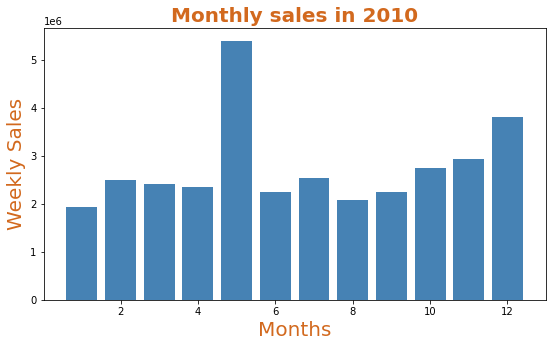

In [195]:
# Monthly sales for each years

# 2010

plt.figure(figsize=(9,5))

plt.bar(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"], color='steelblue')
plt.xlabel("Months", fontsize = 20, color='chocolate')
plt.ylabel("Weekly Sales", fontsize = 20, color='chocolate')
plt.title('Monthly sales in 2010', fontsize = 20,weight='bold', color='chocolate')
plt.show()

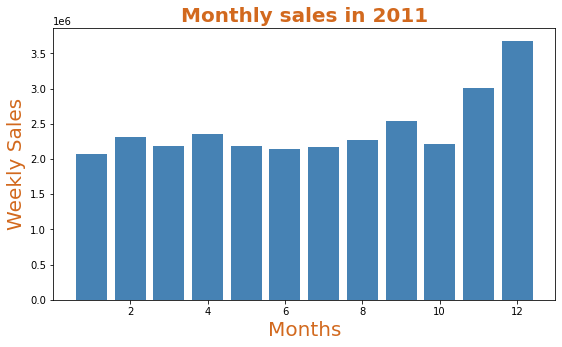

In [193]:
# Monthly sales for each years

# 2011

plt.figure(figsize=(9,5))

plt.bar(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"], color='steelblue')
plt.xlabel("Months", fontsize = 20, color='chocolate')
plt.ylabel("Weekly Sales", fontsize = 20, color='chocolate')
plt.title('Monthly sales in 2011', fontsize = 20,weight='bold', color='chocolate')
plt.show()

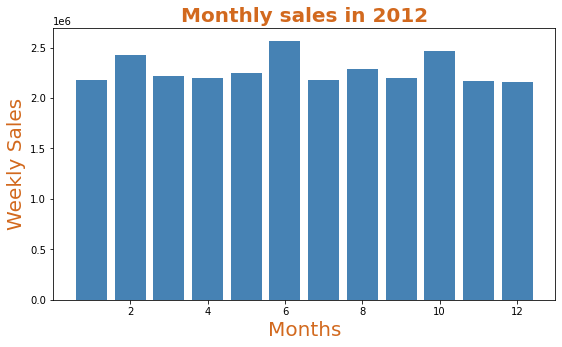

In [236]:
# Monthly sales for each years

# 2012

plt.figure(figsize=(9, 5))

plt.bar(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"], color='steelblue')
plt.xlabel("Months", fontsize = 20, color='chocolate')
plt.ylabel("Weekly Sales", fontsize = 20, color='chocolate')
plt.title('Monthly sales in 2012', fontsize = 20,weight='bold', color='chocolate')
plt.show()

Text(0, 0.5, 'Weekly Sales')

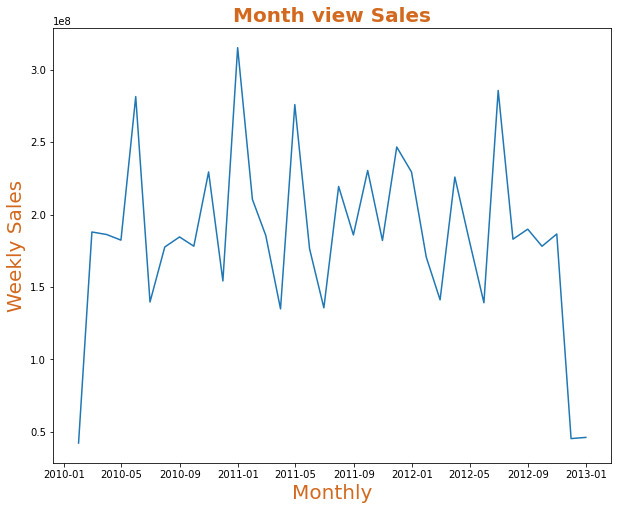

In [232]:
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month view Sales', fontsize = 20,weight='bold', color='chocolate')
plt.xlabel('Monthly', fontsize = 20, color='chocolate')
plt.ylabel('Weekly Sales', fontsize = 20, color='chocolate')

## 4- Some holidays have a negative impact on sales, which holidays have lowest sales?

In [198]:
# holiday week = 1 / non holiday week = 0

holiday_sales = df[df['Holiday_Flag'] == 1]
nonholiday_sales = df[df['Holiday_Flag'] == 0]


### Super Bowl Day

In [219]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

SuperBowl_sales = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('12-02-2010'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('11-02-2011'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('10-02-2012'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('08-02-2013'))]


In [280]:
SuperBowl_sales_sum = SuperBowl_sales['Weekly_Sales'].sum()
print("Super Bowl Sales =",SuperBowl_sales_sum)

Super Bowl Sales = 141894853.91


### Labour Day

In [276]:
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

LabourDay_sales = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('10-09-2010'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('07-09-2012'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('06-09-2013'))]



In [278]:
LabourDay_sales_sum = LabourDay_sales['Weekly_Sales'].sum()
print("Labour Day Sales =",LabourDay_sales_sum)

Labour Day Sales = 140406574.46


### Thanksgiving

In [272]:
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Thanksgiving_sales = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('26-11-2010'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('25-11-2011'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('23-11-2012'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('29-11-2013'))]


In [274]:
Thanksgiving_sales_sum = Thanksgiving_sales['Weekly_Sales'].sum()
print("Thanksgiving Sales =",Thanksgiving_sales_sum)

Thanksgiving Sales = 127722562.55000001


### Christmas

In [208]:
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Christmas_sales = holiday_sales[(pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('31-12-2010'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('30-12-2011'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('28-12-2012'))|
                                (pd.to_datetime(holiday_sales['Date']) == pd.to_datetime('27-12-2013'))]


In [264]:
Christmas_sales_sum = Christmas_sales['Weekly_Sales'].sum()
print("Christmas Sales =",Christmas_sales_sum)

Christmas Sales = 86474980.03999999


### The sales increased during Super Bowl Day, and the sales decreased during christmas

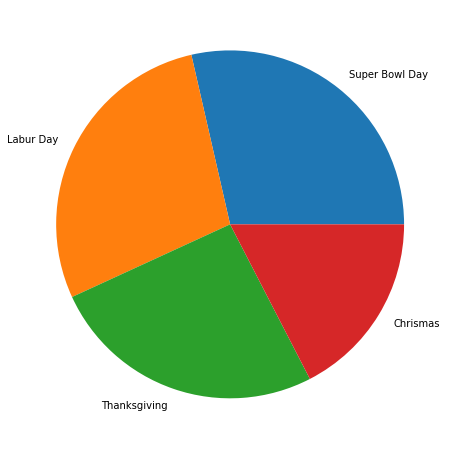

In [284]:
plt.figure(figsize=(12, 8))


x = [SuperBowl_sales_sum, LabourDay_sales_sum, Thanksgiving_sales_sum, Christmas_sales_sum]
y = ['Super Bowl Day', 'Labur Day', 'Thanksgiving', 'Chrismas']

plt.pie(x, labels = y)
plt.show()

# <a name='Conculsion' >Conculsion</a> 

In conclusion, 
- We found out what are the highest and lowest stores based on weekly sales. 
- Which store has the maximum sales and which one has the minmum.
- We created new columns (day,month,year) to find out the monthly sales for each year 2010-2012